## 0.) Library

In [1]:
!pip3 install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 1.) Import Dataset

In [3]:
file_path = 'CDR-Call-Details.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
print(df.head())

  Phone Number  Account Length  VMail Message  Day Mins  Day Calls  \
0     382-4657             128             25     265.1        110   
1     371-7191             107             26     161.6        123   
2     358-1921             137              0     243.4        114   
3     375-9999              84              0     299.4         71   
4     330-6626              75              0     166.7        113   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       50.90      61.9         88        5.26       196.9           89   
4       28.34     148.3        122       12.61       186.9          121   

   Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn  
0         11.01       10.0           3         2.70

In [4]:
df.head(20)

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,391-8027,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,355-9993,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,329-9001,147,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,335-4719,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,330-8173,141,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
# Display basic info about the dataset
print(df.info())

# Summary statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101174 entries, 0 to 101173
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Phone Number    101174 non-null  object 
 1   Account Length  101174 non-null  int64  
 2   VMail Message   101174 non-null  int64  
 3   Day Mins        101174 non-null  float64
 4   Day Calls       101174 non-null  int64  
 5   Day Charge      101174 non-null  float64
 6   Eve Mins        101174 non-null  float64
 7   Eve Calls       101174 non-null  int64  
 8   Eve Charge      101174 non-null  float64
 9   Night Mins      101174 non-null  float64
 10  Night Calls     101174 non-null  int64  
 11  Night Charge    101174 non-null  float64
 12  Intl Mins       101174 non-null  float64
 13  Intl Calls      101174 non-null  int64  
 14  Intl Charge     101174 non-null  float64
 15  CustServ Calls  101174 non-null  int64  
 16  Churn           101174 non-null  bool   
dtypes: bool(1)

In [6]:
# Convert 'Churn' column to 0 and 1
df['Churn'] = df['Churn'].astype(int)
df.head(20)

,Phone Number,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,382-4657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,371-7191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,358-1921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,375-9999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,330-6626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,391-8027,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,355-9993,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,329-9001,147,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,335-4719,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,330-8173,141,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [7]:
df.drop(columns=["Phone Number"], inplace=True) #unnescessery feature

## 2.) EDA

In [8]:
# Display summary statistics
print(df.describe())

       Account Length  VMail Message       Day Mins      Day Calls  \
count   101174.000000  101174.000000  101174.000000  101174.000000   
mean       323.597149      18.142645     587.080798     267.207613   
std       1418.073651      75.826932    2193.094319     947.963370   
min          1.000000       0.000000       0.000000       0.000000   
25%         69.000000       0.000000     222.300000      88.000000   
50%        202.000000       0.000000     262.200000     202.000000   
75%        240.000000      22.000000     326.275000     224.000000   
max      21111.000000    1111.000000  111111.110000   21111.000000   

          Day Charge       Eve Mins      Eve Calls     Eve Charge  \
count  101174.000000  101174.000000  101174.000000  101174.000000   
mean       64.958811     655.512526     267.166930      34.358125   
std       133.515808    2473.445436     932.914437      36.248577   
min         0.000000       0.000000       0.000000       0.000000   
25%        23.920000    

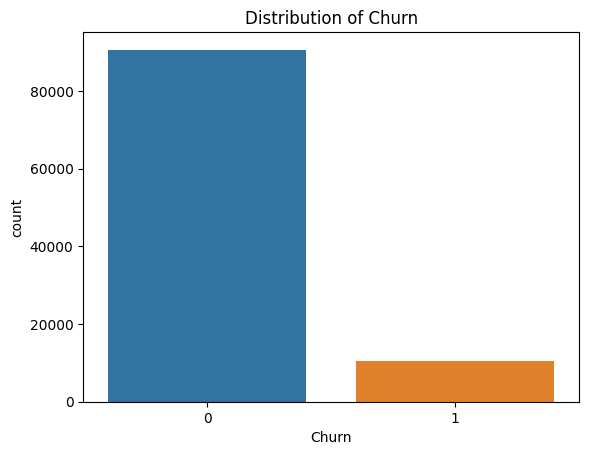

In [9]:
# Visualize the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn')
plt.show()


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


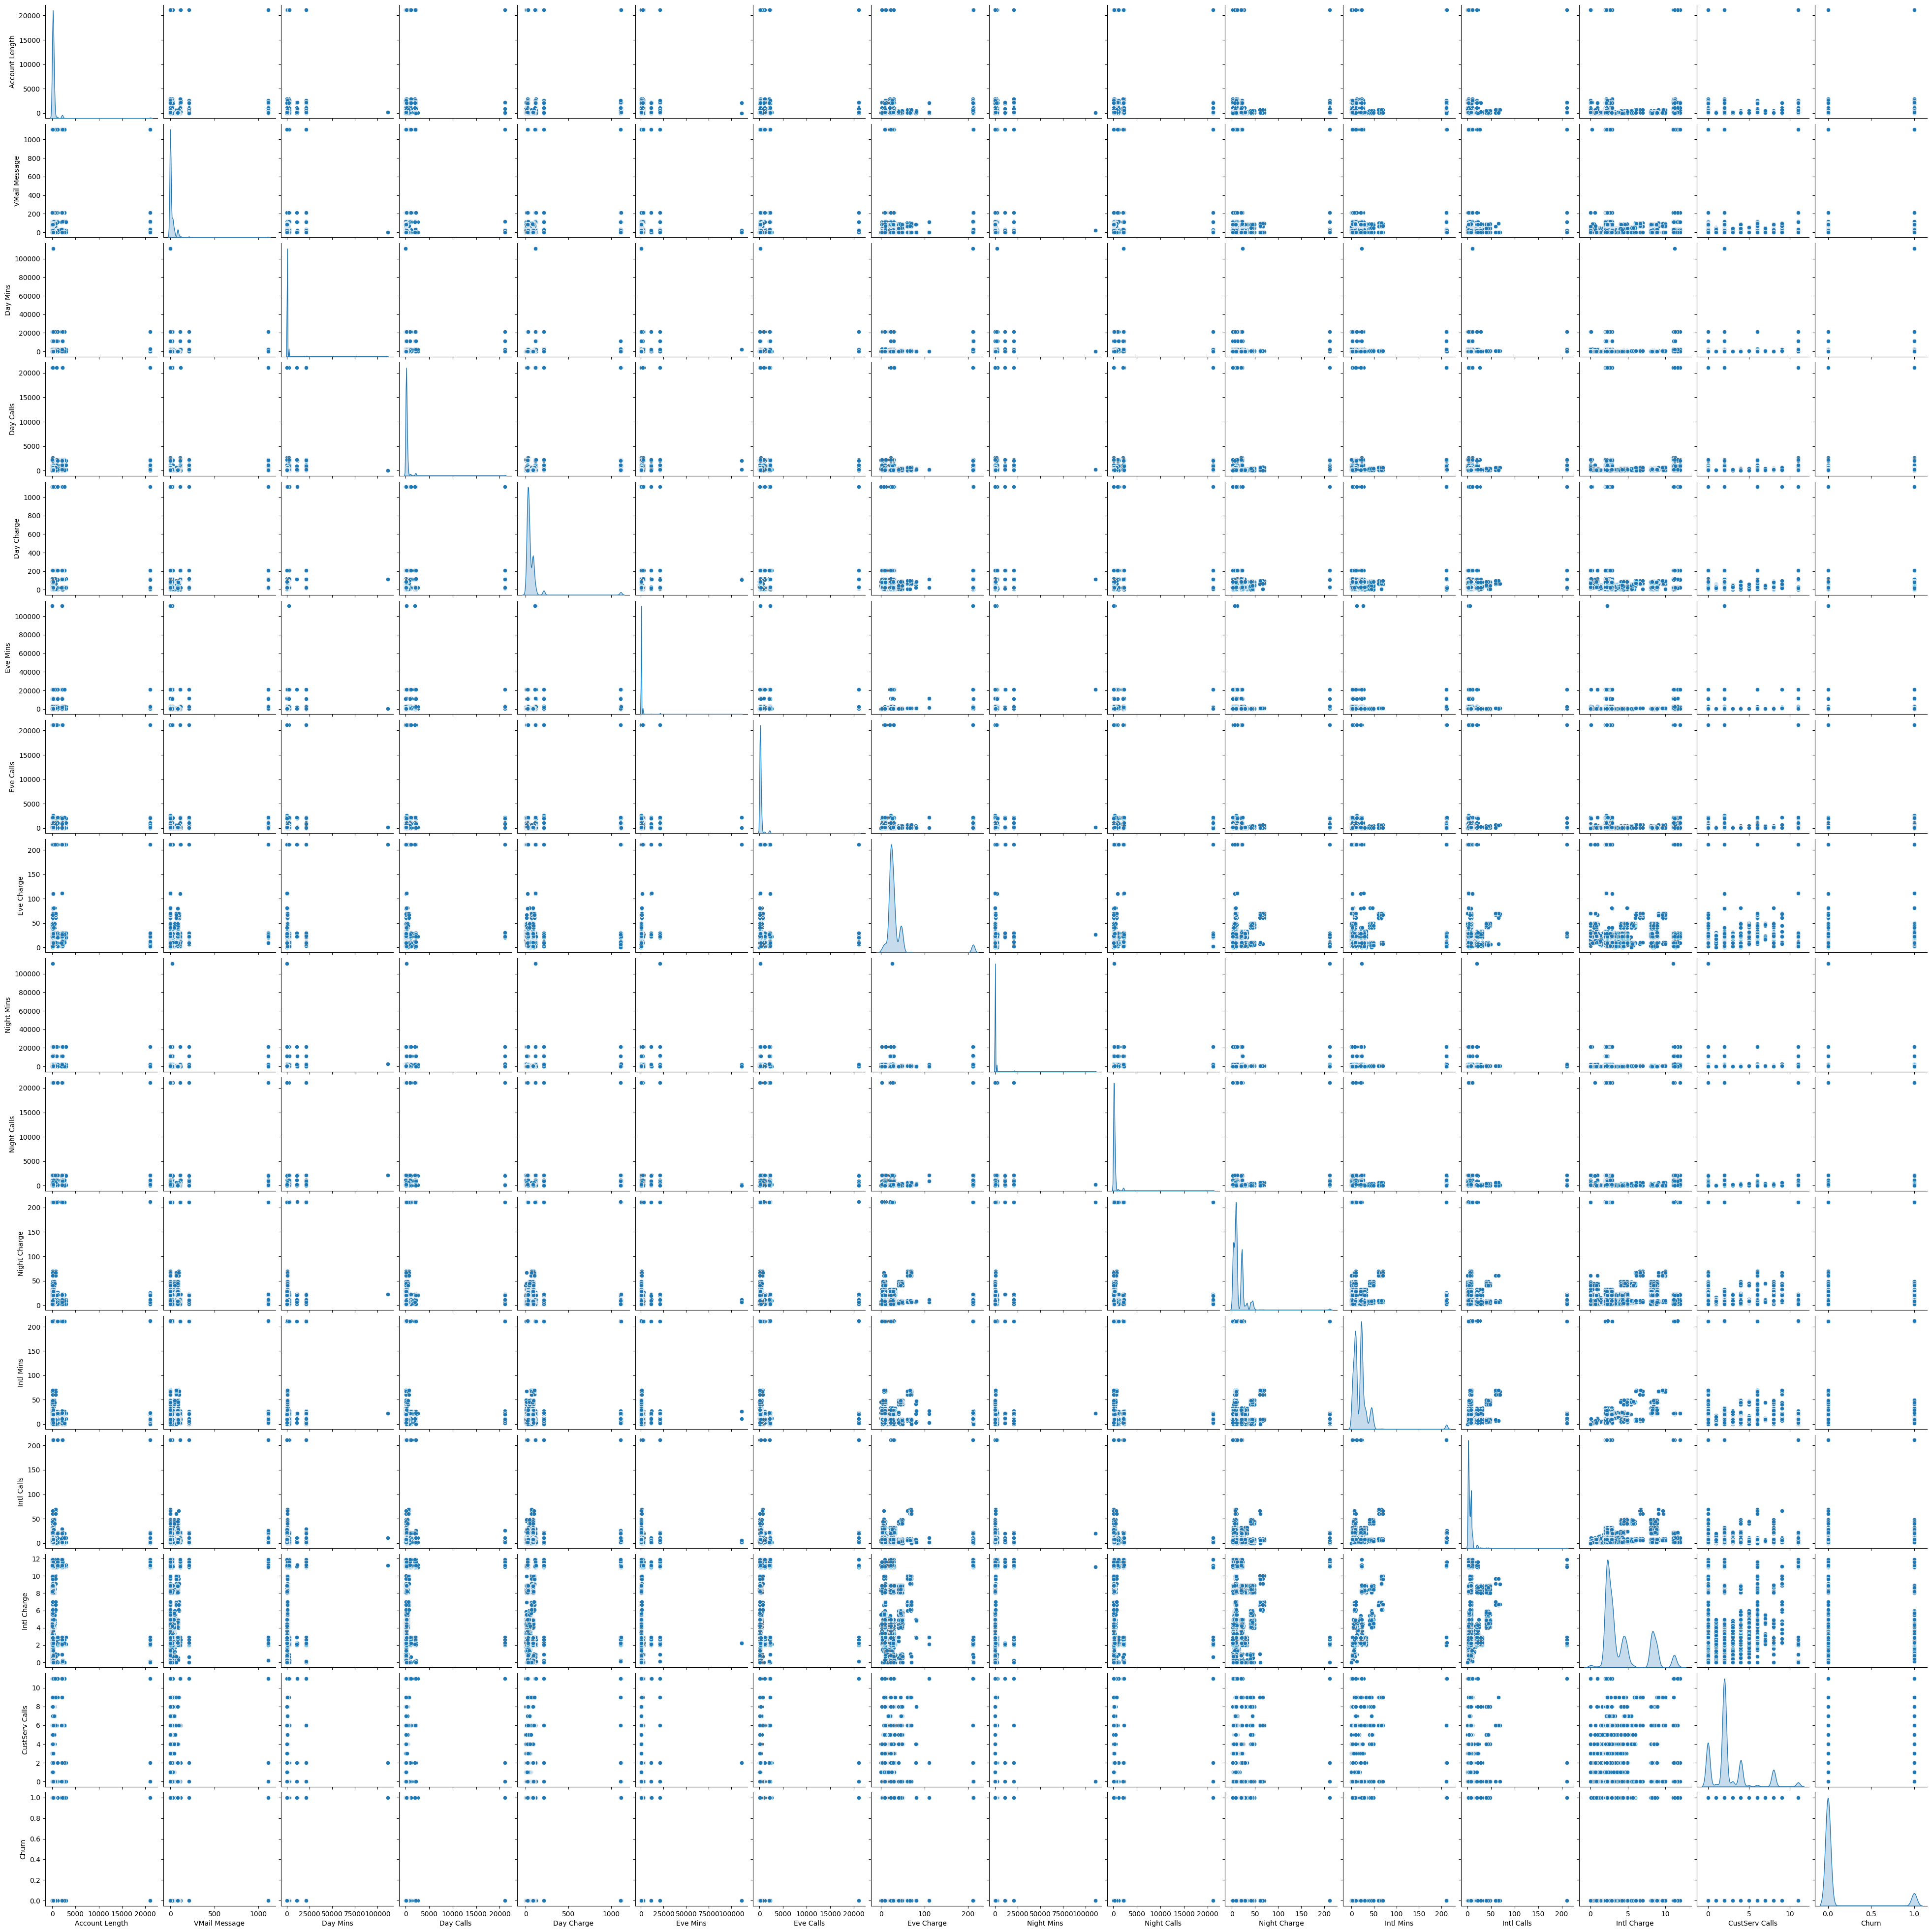

In [10]:
# Pair plot for numerical features
sns.pairplot(df, diag_kind='kde', markers='o')
plt.show()


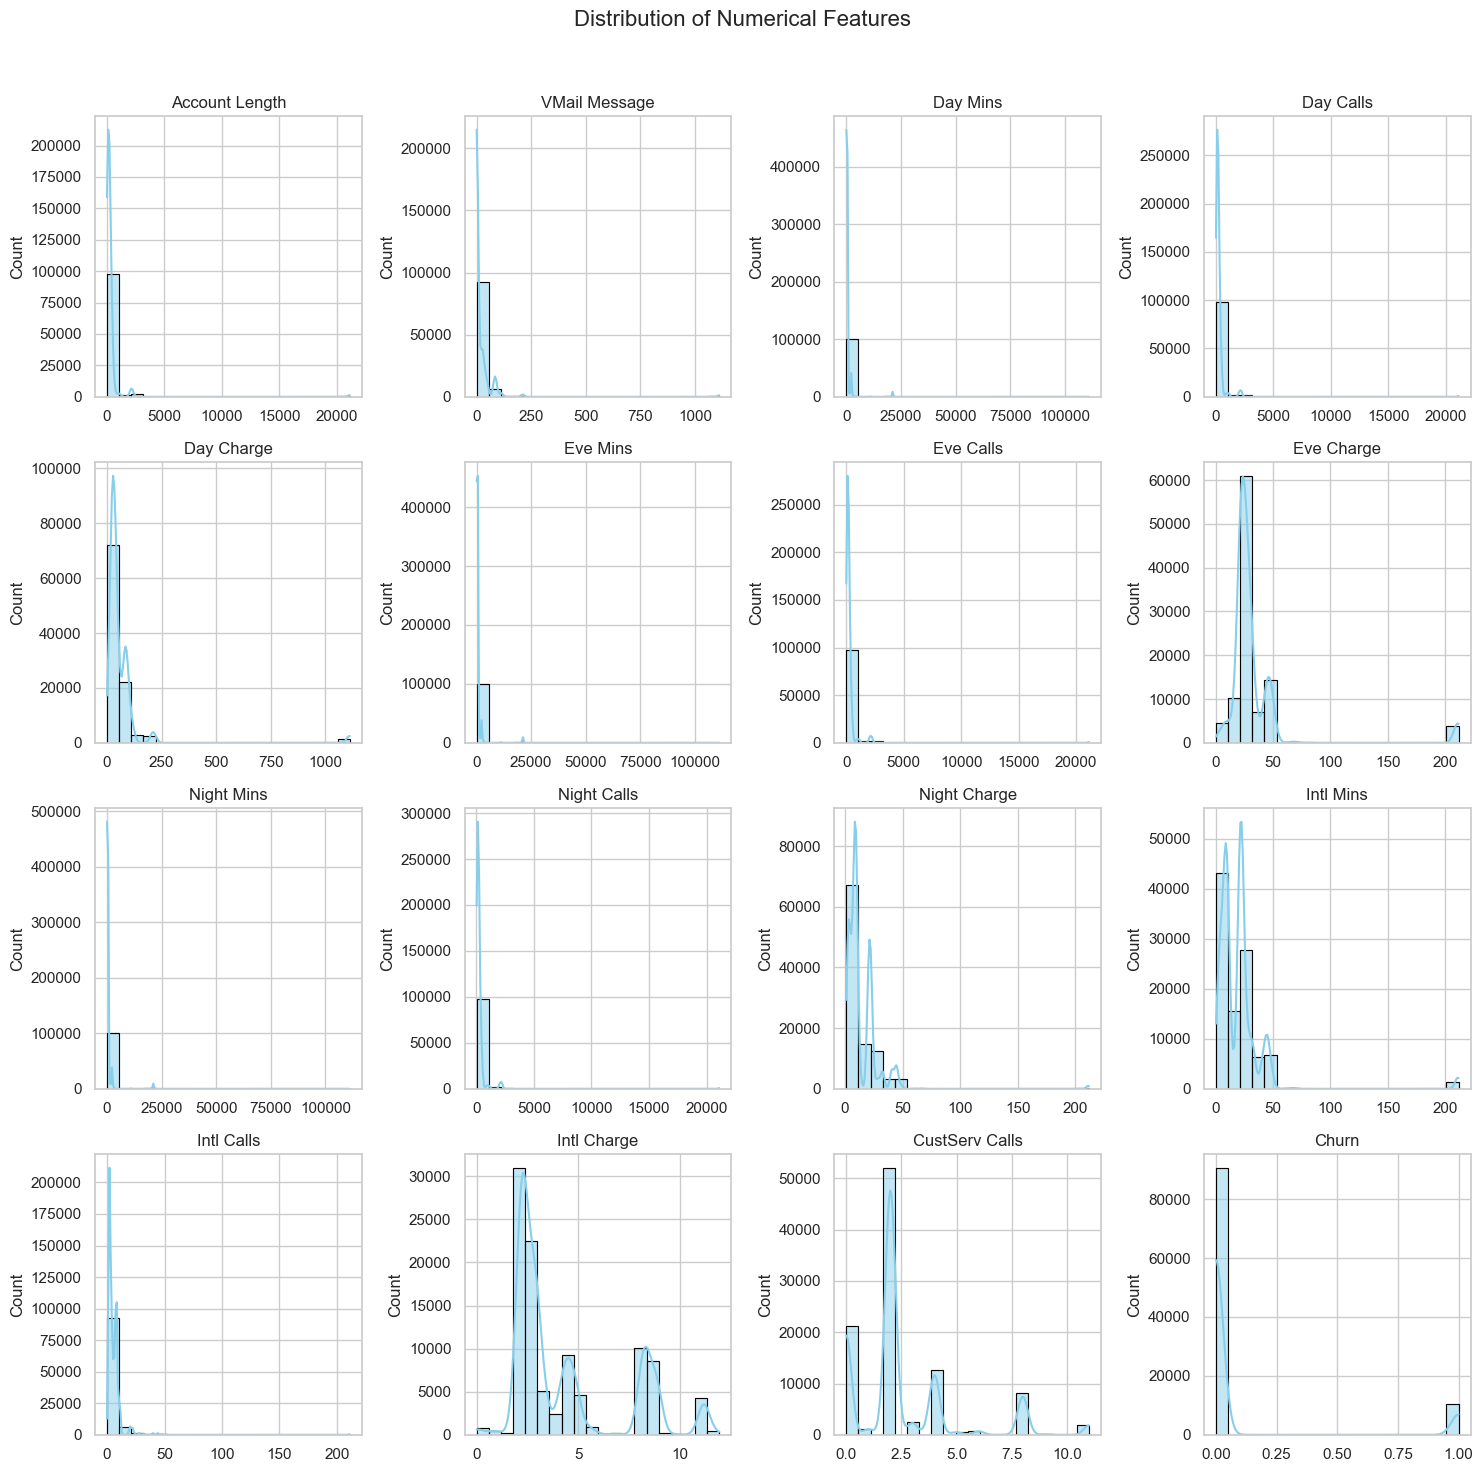

In [11]:
# Set the style for better readability
sns.set(style="whitegrid")

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a histogram
for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

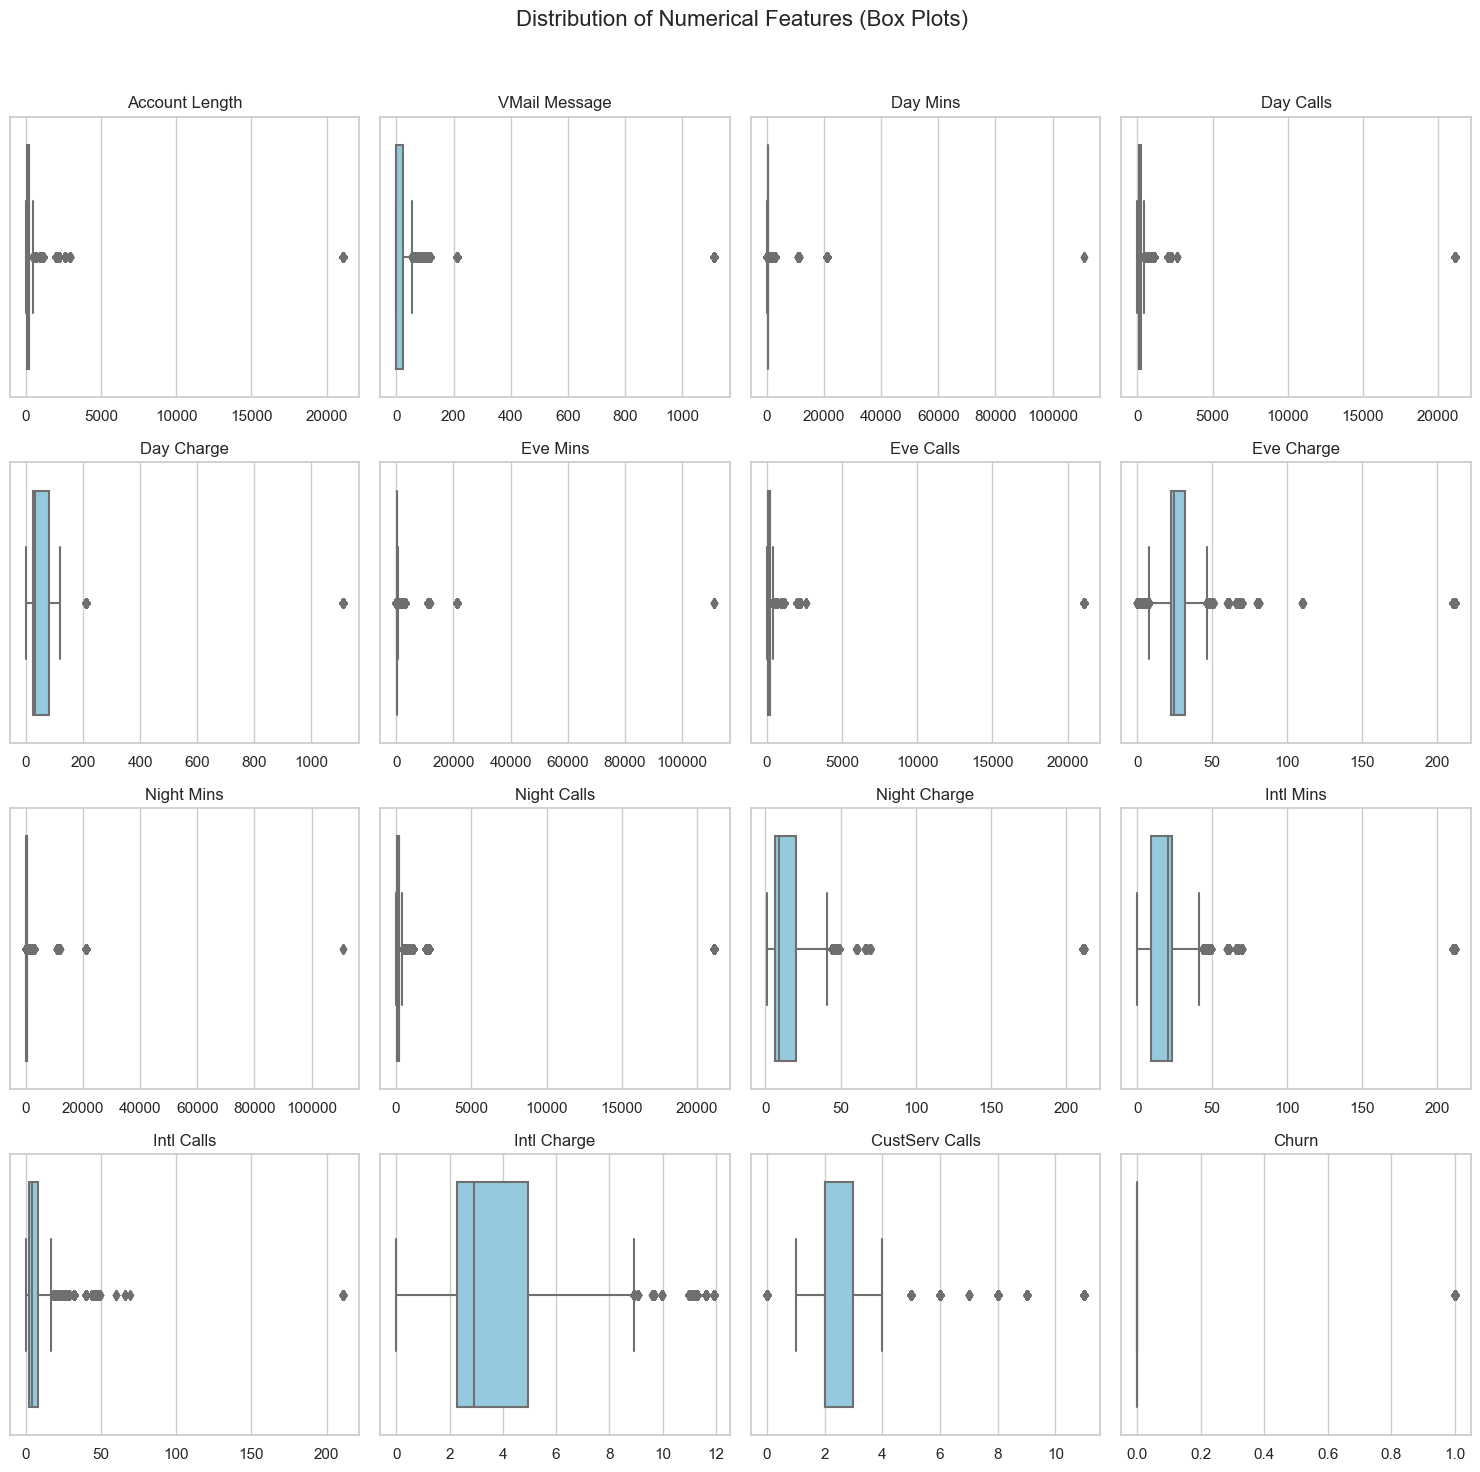

In [12]:
# Set the style for better readability
sns.set(style="whitegrid")

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.suptitle('Distribution of Numerical Features (Box Plots)', fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a box plot
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i], color='skyblue', showfliers=True)
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_19232\2963306083.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y=column, data=df, ax=axes[i], ci=None, palette='pastel')
C:\Users\User\AppData\Local\Temp\ipykernel_19232\2963306083.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y=column, data=df, ax=axes[i], ci=None, palette='pastel')
C:\Users\User\AppData\Local\Temp\ipykernel_19232\2963306083.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y=column, data=df, ax=axes[i], ci=None, palette='pastel')
C:\Users\User\AppData\Local\Temp\ipykernel_19232\2963306083.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Churn', y=column, data=df, ax=axes[i], ci=None, palette='pastel')
C:\Users\User\AppData\Local\

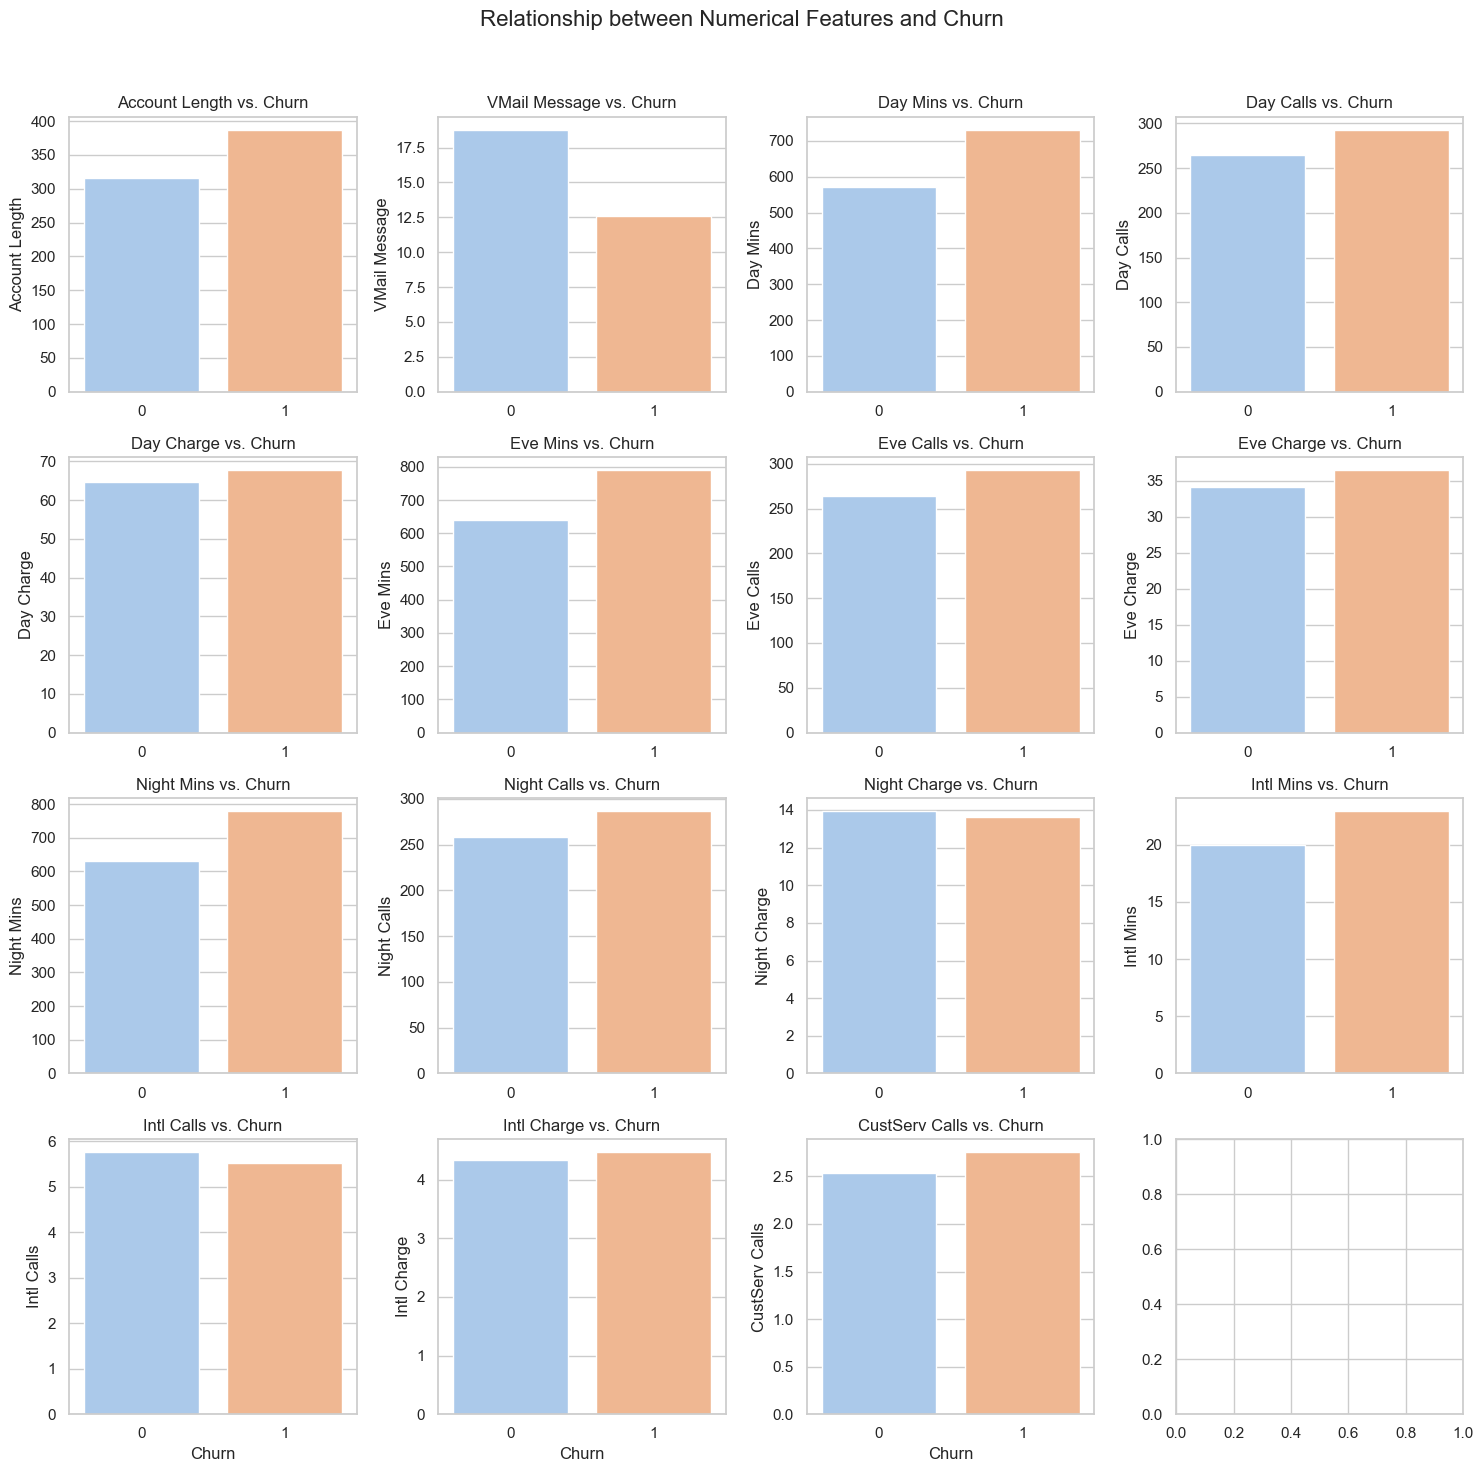

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better readability
sns.set(style="whitegrid")

# Create a grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))
fig.suptitle('Relationship between Numerical Features and Churn', fontsize=16)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a bar plot
for i, column in enumerate(df.columns[:-1]):  # Exclude the target variable 'Churn'
    sns.barplot(x='Churn', y=column, data=df, ax=axes[i], ci=None, palette='pastel')
    axes[i].set_title(f'{column} vs. Churn', fontsize=12)

    # Remove x-axis label for all but the bottom row
    if i < len(df.columns) - 4:
        axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


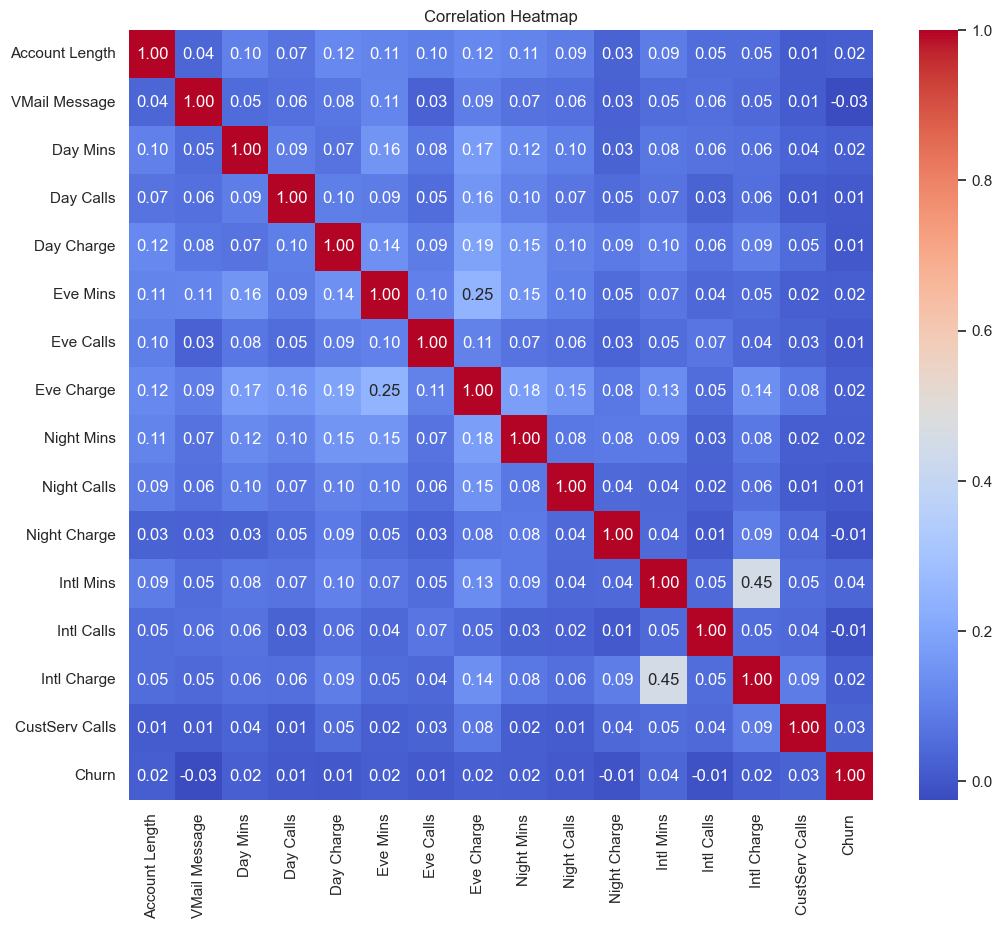

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# Get the top 10 highest correlations
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10)

# Print the top correlations
print("Top 10 Highest Correlations:")
print(top_correlations)

Top 10 Highest Correlations:
Account Length  Account Length    1.000000
Intl Charge     Intl Mins         0.450563
Eve Mins        Eve Charge        0.245130
Day Charge      Eve Charge        0.193730
Eve Charge      Night Mins        0.179312
Day Mins        Eve Charge        0.173200
Day Calls       Eve Charge        0.157566
Day Mins        Eve Mins          0.155090
Night Mins      Eve Mins          0.152819
Day Charge      Night Mins        0.152610
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_19232\1566117771.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(pps_matrix.pivot("x", "y", "ppscore"), annot=True, cmap="viridis", fmt=".2f")


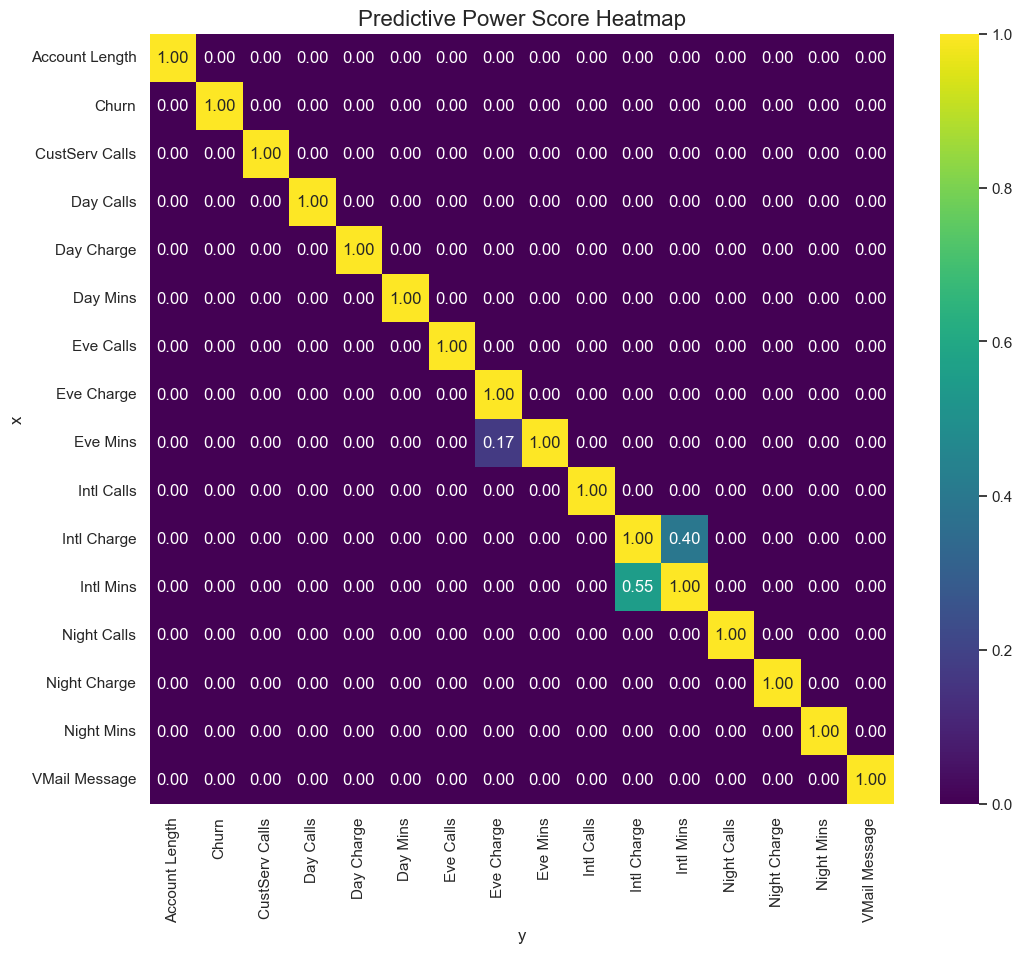

Top 10 Highest Predictive Power Scores:
                  x               y  ppscore            case  is_valid_score  \
0    Account Length  Account Length      1.0  predict_itself            True   
17    VMail Message   VMail Message      1.0  predict_itself            True   
238  CustServ Calls  CustServ Calls      1.0  predict_itself            True   
221     Intl Charge     Intl Charge      1.0  predict_itself            True   
204      Intl Calls      Intl Calls      1.0  predict_itself            True   
187       Intl Mins       Intl Mins      1.0  predict_itself            True   
170    Night Charge    Night Charge      1.0  predict_itself            True   
153     Night Calls     Night Calls      1.0  predict_itself            True   
136      Night Mins      Night Mins      1.0  predict_itself            True   
119      Eve Charge      Eve Charge      1.0  predict_itself            True   

    metric  baseline_score  model_score model  
0     None             0.0     

In [16]:
import ppscore as pps

# Compute the Predictive Power Score matrix
pps_matrix = pps.matrix(df)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with annotations for the PPS matrix
sns.heatmap(pps_matrix.pivot("x", "y", "ppscore"), annot=True, cmap="viridis", fmt=".2f")

# Set the title of the plot
plt.title('Predictive Power Score Heatmap', fontsize=16)

# Show the plot
plt.show()

# Print the top 10 highest PPS
top_pps = pps_matrix.sort_values(by='ppscore', ascending=False).head(10)
print("Top 10 Highest Predictive Power Scores:")
print(top_pps)


## 3.) Feature engineering 

In [ ]:
df['Eve_Min_Eve_Charge_Interaction'] = df['Eve Min'] * df['Eve Charge']
df['Intl_Mins_Intl_Charge_Interaction'] = df['Intl Mins'] * df['Intl Charge']

In [23]:
skewness = df.skew()
print(skewness)

Account Length                  13.755199
VMail Message                   12.350965
Day Mins                        12.959056
Day Calls                       19.509248
Day Charge                       7.152886
Eve Mins                        13.553679
Eve Calls                       19.600099
Eve Charge                       4.317852
Night Mins                      11.436149
Night Calls                     20.394657
Night Charge                     7.235795
Intl Mins                        5.806115
Intl Calls                      15.836124
Intl Charge                      1.099626
CustServ Calls                   1.599487
Churn                            2.592824
Day_Mins_Charge_Interaction     16.096086
Eve_Mins_Charge_Interaction     28.027396
Intl_Mins_Charge_Interaction     7.338287
dtype: float64


In [24]:
# List of positively skewed features
positively_skewed_features = ['Day Calls', 'Eve Calls', 'Night Calls', 'CustServ Calls', 'Day_Mins_Charge_Interaction', 'Eve_Mins_Charge_Interaction', 'Intl_Mins_Charge_Interaction']

# Apply log transformation to each feature
for feature in positively_skewed_features:
    df[feature + '_log'] = np.log1p(df[feature])

In [20]:
df.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

In [26]:
#scaling
numerical_features = df.drop('Churn', axis=1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Create a new DataFrame with the scaled numerical features
df_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns)

# Concatenate the scaled numerical features with the target variable 'Churn'
df_scaled['Churn'] = df['Churn']

## 4.) Feature Selection 

In [31]:
# Assuming df_scaled is your entire dataset
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled.drop('Churn', axis=1),  # Features (exclude 'Churn')
    df_scaled['Churn'],  # Target variable
    test_size=0.2,  # Adjust the test size as needed
    random_state=42  # Set a random seed for reproducibility
)

In [30]:
pps_matrix 

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Account Length,Account Length,1.0,predict_itself,True,None,0.000000,1.000000,None
1,Account Length,VMail Message,0.0,regression,True,mean absolute error,0.230750,0.345157,DecisionTreeRegressor()
2,Account Length,Day Mins,0.0,regression,True,mean absolute error,0.163757,0.224276,DecisionTreeRegressor()
3,Account Length,Day Calls,0.0,regression,True,mean absolute error,0.201389,0.251742,DecisionTreeRegressor()
4,Account Length,Day Charge,0.0,regression,True,mean absolute error,0.303527,0.354061,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
671,Churn,CustServ Calls_log,0.0,regression,True,mean absolute error,0.657288,0.689984,DecisionTreeRegressor()
672,Churn,Day_Mins_Charge_Interaction_log,0.0,regression,True,mean absolute error,0.684331,0.708051,DecisionTreeRegressor()
673,Churn,Eve_Mins_Charge_Interaction_log,0.0,regression,True,mean absolute error,0.611311,0.666007,DecisionTreeRegressor()
674,Churn,Intl_Mins_Charge_Interaction_log,0.0,regression,True,mean absolute error,0.810984,0.815164,DecisionTreeRegressor()


## 5.) Preprocessig

In [33]:
df_scaled.isna().sum()

Account Length                      0
VMail Message                       0
Day Mins                            0
Day Calls                           0
Day Charge                          0
Eve Mins                            0
Eve Calls                           0
Eve Charge                          0
Night Mins                          0
Night Calls                         0
Night Charge                        0
Intl Mins                           0
Intl Calls                          0
Intl Charge                         0
CustServ Calls                      0
Day_Mins_Charge_Interaction         0
Eve_Mins_Charge_Interaction         0
Intl_Mins_Charge_Interaction        0
Day Calls_log                       0
Eve Calls_log                       0
Night Calls_log                     0
CustServ Calls_log                  0
Day_Mins_Charge_Interaction_log     0
Eve_Mins_Charge_Interaction_log     0
Intl_Mins_Charge_Interaction_log    0
Churn                               0
dtype: int64